In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sqli

In [63]:
# Define the database file name
db_file = 'sales_data.db'

# Define the table name
table_name = 'sales'

# Define the columns for the sales table
columns = [
    ('item_name', 'TEXT'),
    ('quantity', 'INTEGER'),
    ('quantity_sold', 'INTEGER'),
    ('price', 'REAL'),
    ('total_revenue', 'REAL')
]

try:
    conn = sqli.connect(db_file)
    # Connect to the SQLite database (creates the file if it doesn't exist)
   
    cursor = conn.cursor()

    # Construct the CREATE TABLE statement
    create_table_sql = f"CREATE TABLE IF NOT EXISTS {table_name} ("
    for i, (col_name, col_type) in enumerate(columns):
        create_table_sql += f"{col_name} {col_type}"
        if i < len(columns) - 1:
            create_table_sql += ", "
    create_table_sql += ")"

    # Execute the CREATE TABLE statement
    cursor.execute(create_table_sql)

    print(f"Successfully created table '{table_name}' in database '{db_file}'.")

    # Commit the changes
    conn.commit()

except sqli.Error as e:
    print(f"An error occurred: {e}")

finally:
    # Close the database connection
    if conn:
        conn.close()

Successfully created table 'sales' in database 'sales_data.db'.


In [64]:
import random
# Define the database file name and table name
db_file = 'sales_data.db'
table_name = 'sales'

# Sample item names
item_names = ['Laptop', 'Mouse', 'Keyboard', 'Monitor', 'Webcam',
              'Headphones', 'Speaker', 'USB Drive', 'External HDD', 'Printer']

try:
    # Connect to the SQLite database
    conn = sqli.connect(db_file)
    cursor = conn.cursor()

    # Function to generate random sales data
    def generate_sales_data():
        item = random.choice(item_names)
        quantity = random.randint(10, 100)
        quantity_sold = random.randint(0, quantity)
        price = round(random.uniform(20, 500), 2)
        total_revenue = round(quantity_sold * price, 2)
        return (item, quantity, quantity_sold, price, total_revenue)

    # Insert 10 rows of dummy data
    for _ in range(10):
        data = generate_sales_data()
        insert_sql = f"INSERT INTO {table_name} (item_name, quantity, quantity_sold, price, total_revenue) VALUES (?, ?, ?, ?, ?)"
        cursor.execute(insert_sql, data)

    # Commit the changes
    conn.commit()
    print(f"Successfully inserted 10 rows of dummy data into the '{table_name}' table in '{db_file}'.")

except sqli.Error as e:
    print(f"An error occurred: {e}")

finally:
    # Close the database connection
    if conn:
        conn.close()

Successfully inserted 10 rows of dummy data into the 'sales' table in 'sales_data.db'.


In [65]:
try:
    # Connect to the SQLite database
    conn = sqli.connect(db_file)
    cursor = conn.cursor()

    # Basic SQL query
    query = """
    SELECT item_name AS product,
           SUM(quantity) AS total_qty,
           SUM(quantity_sold * price) AS revenue
    FROM sales
    GROUP BY product
    """

    # Load the query results into a pandas DataFrame
    df = pd.read_sql_query(query, conn)

    # Print the results
    print("Query Results:")
    print(df)

finally:
    # Close the database connection
    if conn:
        conn.close()

Query Results:
        product  total_qty    revenue
0  External HDD        531   38266.38
1    Headphones        406   53846.28
2      Keyboard        481   50293.76
3        Laptop        525   71492.18
4       Monitor        619   52997.14
5         Mouse        704   76105.36
6       Printer        938  103357.59
7       Speaker        721  114009.50
8     USB Drive        907   97125.22
9        Webcam        709  100033.21



Sales chart saved as sales_chart.png


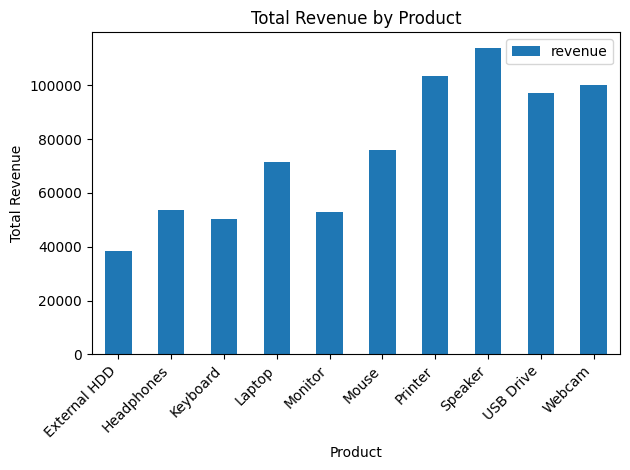

In [66]:
df.plot(kind='bar', x='product', y='revenue', title='Total Revenue by Product')
plt.xlabel("Product")  # Use plt.xlabel
plt.ylabel("Total Revenue")  # Use plt.ylabel
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the chart (optional)
plt.savefig("sales_chart.png")
print("\nSales chart saved as sales_chart.png")

# Show the plot (optional - if you are running in an environment where plots are displayed)
plt.show()